In [334]:
import numpy as np

import matplotlib.pyplot as plt

from bdg_method import BdG_method

In [335]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
N = 16
Nc = 2
t = 1
mu = 2
T = 0.5

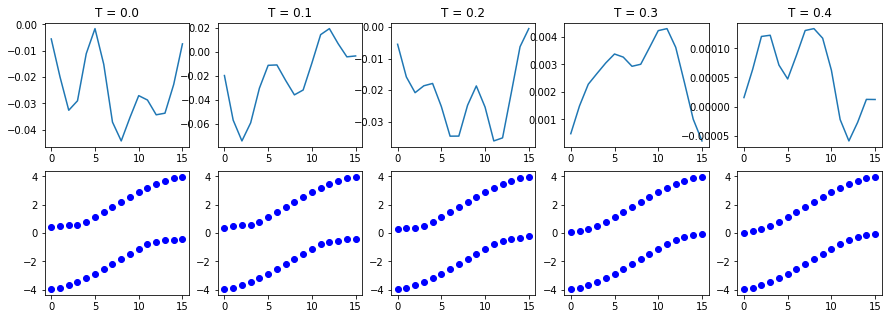

In [276]:
T_set = np.linspace(0, 0.4, 5)

fig, axs = plt.subplots(2, len(T_set), figsize=(15,5))

# Creating a BdG instance
for i, T in enumerate(T_set):
    solver = BdG_method(N, Nc, mu, t, T)
    for j in range(10):
        solver.run_solver()
    
    delta_diag = np.diagonal(np.fliplr(solver.delta))
    axs[0,i].plot(np.real(delta_diag))
        
    axs[0,i].set_title("T = {0}".format(round(T, 3)))
    #axs[0,i].imshow(np.real(solver.H_bdg))
    
    energy_array, eigenvalues = np.linalg.eig(solver.H_bdg)
    energy_array.sort()
    
    for j, e in enumerate(np.real(energy_array)):
        axs[1,i].scatter(j%N, e, c="b")

T = 0.0
T = 0.008974358974358974


/home/axel/Studier/bdg_formalism/BdG-numerical/code/bdg_method.py:55: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(np.real(E)/(self.kB * self.T)) + 1)


T = 0.017948717948717947
T = 0.02692307692307692
T = 0.035897435897435895
T = 0.044871794871794865
T = 0.05384615384615384
T = 0.06282051282051282
T = 0.07179487179487179
T = 0.08076923076923076
T = 0.08974358974358973
T = 0.09871794871794871
T = 0.10769230769230768
T = 0.11666666666666665
T = 0.12564102564102564
T = 0.1346153846153846
T = 0.14358974358974358
T = 0.15256410256410255
T = 0.16153846153846152
T = 0.1705128205128205
T = 0.17948717948717946
T = 0.18846153846153846
T = 0.19743589743589743
T = 0.2064102564102564
T = 0.21538461538461537
T = 0.22435897435897434
T = 0.2333333333333333
T = 0.24230769230769228
T = 0.2512820512820513
T = 0.2602564102564102
T = 0.2692307692307692
T = 0.27820512820512816
T = 0.28717948717948716
T = 0.29615384615384616
T = 0.3051282051282051
T = 0.3141025641025641
T = 0.32307692307692304
T = 0.33205128205128204
T = 0.341025641025641
T = 0.35


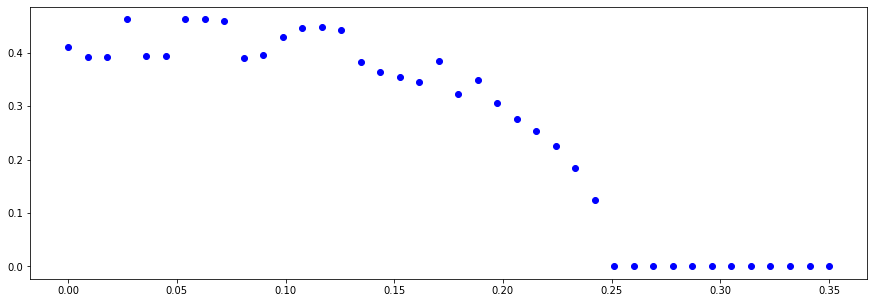

In [327]:
# Calculating the gap parameter amplitude
T_set = np.linspace(0, 0.35, 40)
def spatial_wave_function(j, beta, N):
    return np.sqrt(1/N) * np.cos(2*np.pi * beta * j / N)

fig, axs = plt.subplots(1, 1, figsize=(15,5))

# Creating a BdG instance
for i, T in enumerate(T_set):
    solver = BdG_method(N, Nc, mu, t, T)
    print("T = {0}".format(T))
    for j in range(4000):
        solver.run_solver()
    
    # delta_j = np.zeros(solver.N, dtype='complex64')
    # for j in range(solver.N):
    #     for beta1 in range(solver.N):
    #         for beta2 in range(solver.N):
    #             delta_j[j] += solver.delta[beta1,beta2] * spatial_wave_function(j, beta1, solver.N) *  np.conj(spatial_wave_function(j, beta2, solver.N))
    delta_j = solver.get_spatial_1d_gap_parameter()
    axs.scatter(T, abs(min(np.abs(delta_j)) - max(np.abs(delta_j))), c="b")    

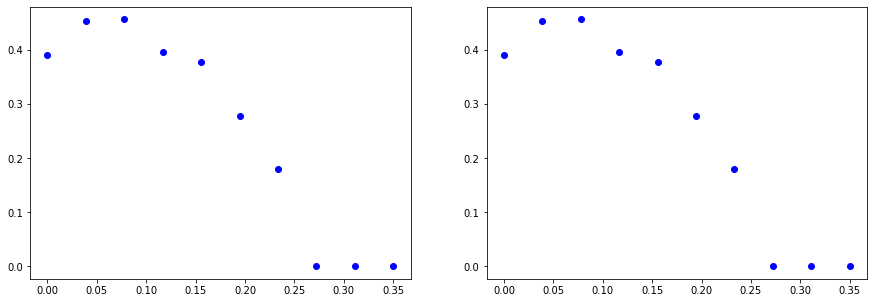

In [359]:
# Calculating the gap parameter amplitude
T_set = np.linspace(0, 0.35, 10)

def spatial_wave_function(j, beta, N):
    return np.sqrt(1/N) * np.cos(2*np.pi * beta * j / N)

fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Creating a BdG instance
for i, T in enumerate(T_set):
    solver = BdG_method(N, Nc, mu, t, T, spatial_wave_function)
    solver.run_solver(100)
    delta_j = solver.get_spatial_1d_gap_parameter()
    axs[1].scatter(T, solver.get_order_parameter_amplitude(delta_j), c="b")
    axs[0].scatter(T, abs(min(np.abs(delta_j)) - max(np.abs(delta_j))), c="b")

In [268]:
Tc = 0.25
delta0 = 3.52/2 * Tc
delta0

0.44

$\mathrm{T_c} = 0.488$

In [347]:
solver = BdG_method(N, Nc, mu, t, T, spatial_wave_function)
solver.run_solver()

solver.get_spatial_1d_gap_parameter()

array([-0.06631773+0.0458267j ,  0.01389224-0.03056402j,
        0.02556447-0.01520951j,  0.05632622-0.00396166j,
       -0.04487327+0.01352643j, -0.03098873-0.04363186j,
        0.04191462-0.03791162j, -0.01362392+0.08862849j,
        0.05131694-0.06377094j, -0.01362392+0.08862849j,
        0.04191462-0.03791162j, -0.03098873-0.04363186j,
       -0.04487327+0.01352643j,  0.05632622-0.00396166j,
        0.02556447-0.01520951j,  0.01389224-0.03056402j], dtype=complex64)

In [361]:
N = 40
T_set = np.linspace(0, 0.35, 5)

fig, axs = plt.subplots(1, len(T_set), figsize=(15,5))

# Creating a BdG instance
for i, T in enumerate(T_set):
    print("T=", T)
    solver = BdG_method(N, Nc, mu, t, T, spatial_wave_function)
    solver.run_solver(100)
        
    axs[i].set_title("T = {0}".format(round(T, 3)))
    #axs[0,i].imshow(np.real(solver.H_bdg))
    
    axs[i].plot(np.real(solver.get_spatial_1d_gap_parameter()))


